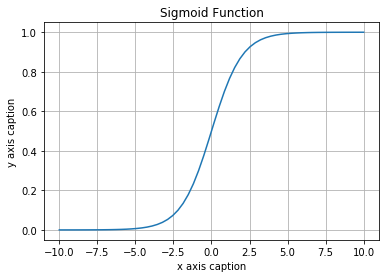

In [2]:
from matplotlib import pyplot as plt
import numpy as np
import math
x = np.linspace(-10,10,60)
y = 1/(1+np.exp(-x))
plt.title("Sigmoid Function") 
plt.xlabel("x axis caption") 
plt.ylabel("y axis caption") 
plt.plot(x,y) 
plt.grid()
plt.show()

In [10]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
# 读取数据并划分
def loadDataSet():
    file = open(r"F:\0_个人学习\3_数据分析与挖掘\4_机器学习\1_逻辑回归\test.txt",'r')
    # 创建数据列表
    dataMat = []
    # 创建标签列表
    labelMat = []
    for line in file.readlines():
        lineArr = line.strip().split()
        dataMat.append([1.0, float(lineArr[0]), float(lineArr[1])])        #添加数据
        labelMat.append(int(lineArr[2]))                                  #添加标签
    file.close()                                                      #关闭文件
    return dataMat, labelMat   

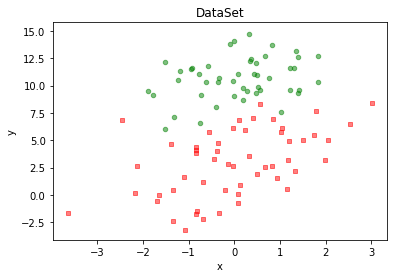

In [22]:
# 绘制图像
def plotDataSet():
    # 读取数据
    dataMat, labelMat = loadDataSet()
    # 转换成数组
    dataArr = np.array(dataMat)
    # 数据个数
    x = np.shape(dataArr)[0]
    #正样本
    xcord1 = []
    ycord1 = []  
    #负样本
    xcord2 = []
    ycord2 = []   
    for i in range(x):
        if int(labelMat[i]) == 1:
            xcord1.append(dataArr[i,1])
            ycord1.append(dataArr[i,2])
        else:
            xcord2.append(dataArr[i,1])
            ycord2.append(dataArr[i,2])
    fig = plt.figure(figsize=(6,4))
    ax = fig.add_subplot(111) 
    ax.scatter(xcord1, ycord1, s = 20, c = 'red', marker = 's',alpha=.5)#绘制正样本
    ax.scatter(xcord2, ycord2, s = 20, c = 'green',alpha=.5)            #绘制负样本
    plt.title('DataSet')                                                #绘制title
    plt.xlabel('x'); plt.ylabel('y')                                    #绘制label
    plt.show()
plotDataSet()

In [25]:
# sigmoid函数
def sigmoid(inX):
    return 1.0 / (1 + np.exp(-inX))
# 梯度上升法
def gradAscent(dataMatIn, classLabels):
    dataMatrix = np.mat(dataMatIn)
    labelMatrix = np.mat(classLabels).transpose()
    m,n = np.shape(dataMatrix)
    alpha = 0.001
    maxCycles = 500
    weights = np.ones((n,1))
    for k in range(maxCycles):
        h = sigmoid(dataMatrix * weights)
        error = labelMatrix - h
        weights = weights + alpha * dataMatrix.transpose() * error
    return weights
dataMat, labelMat = loadDataSet()
gradAscent(dataMat, labelMat)

matrix([[ 4.12414349],
        [ 0.48007329],
        [-0.6168482 ]])

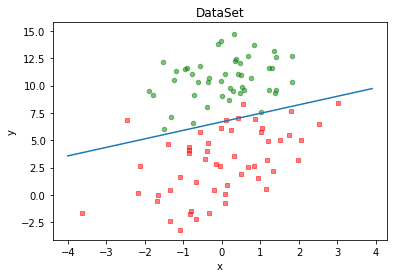

In [34]:
# 绘制图像
def plotDataSet(weights):
    # 读取数据
    dataMat, labelMat = loadDataSet()
    # 转换成数组
    dataArr = np.array(dataMat)
    # 数据个数
    x = np.shape(dataArr)[0]
    #正样本
    xcord1 = []
    ycord1 = []  
    #负样本
    xcord2 = []
    ycord2 = []   
    for i in range(x):
        if int(labelMat[i]) == 1:
            xcord1.append(dataArr[i,1])
            ycord1.append(dataArr[i,2])
        else:
            xcord2.append(dataArr[i,1])
            ycord2.append(dataArr[i,2])
    fig = plt.figure(figsize=(6,4))
    ax = fig.add_subplot(111) 
    ax.scatter(xcord1, ycord1, s = 20, c = 'red', marker = 's',alpha=.5)#绘制正样本
    ax.scatter(xcord2, ycord2, s = 20, c = 'green',alpha=.5)            #绘制负样本
    
    x = np.arange(-4.0, 4.0, 0.1)
    y = (-weights[0] - weights[1] * x) / weights[2]
    ax.plot(x, y)
    
    plt.title('DataSet')                                                #绘制title
    plt.xlabel('x'); plt.ylabel('y')                                    #绘制label
    plt.show()
    
weights  = gradAscent(dataMat, labelMat)
# 将矩阵转换成数组
weights = list(np.array(weights))
plotDataSet(weights)